In [107]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt


%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [108]:
features_df = pd.read_csv('Datasets/scraped/features.csv')
episodes_df = pd.read_csv('Datasets/data-society-the-simpsons-by-the-data/simpsons_episodes.csv')
voting_df = pd.read_csv('Datasets/scraped/voting_demographics.csv')

voting_df['season'] = voting_df['season'].astype(int)
voting_df['episode'] = voting_df['episode'].astype(int)
voting_df = voting_df.sort_values(by=['season', 'episode'])
voting_df.index += 1
features_df.index +=1
analysis_df = pd.concat([features_df.head(600), voting_df.head(600)], axis=1)
analysis_df['season'] = analysis_df['season'].astype(int)
analysis_df['episode'] = analysis_df['episode'].astype(int)

In [109]:
def smooth(scalars, weight):
    last = scalars[0]
    smoothed = list()
    for point in scalars:
        smoothed_val = last * weight + (1 - weight) * point
        smoothed.append(smoothed_val)
        last = smoothed_val

    return smoothed

def normalize(data, column):
    return (data[column]-data[column].mean())/data[column].std()

In [110]:
analysis_df.describe()

,episode_id,cult_refs_count,self_refs_count,goofs_count,errors_count,Unnamed: 0,season,episode,total_counts,total_rating,...,female_30-44_counts,female_30-44_rating,female_45+_counts,female_45+_rating,top1000_counts,top1000_rating,us_users_counts,us_users_rating,non-us_users_counts,non-us_users_rating
count,600.000000,600.00000,600.000000,600.0000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,...,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,300.500000,6.84000,0.600000,5.5200,0.038333,299.500000,14.100000,11.585000,2126.751667,7.327000,...,115.661667,7.104500,41.340000,6.951833,214.138333,7.279167,689.118333,7.340333,1293.523333,7.312167
std,173.349358,6.36752,2.779606,4.7883,0.428762,173.349358,7.755444,6.549881,1055.946160,0.782811,...,68.671587,0.749934,20.395122,0.757509,36.978077,0.646177,381.389474,0.862465,614.390434,0.753402
min,1.000000,0.00000,0.000000,0.0000,0.000000,0.000000,1.000000,1.000000,853.000000,4.000000,...,26.000000,4.600000,11.000000,4.700000,148.000000,5.000000,227.000000,3.800000,580.000000,4.100000
25%,150.750000,2.00000,0.000000,2.0000,0.000000,149.750000,7.000000,6.000000,1378.000000,6.775000,...,76.000000,6.500000,29.000000,6.400000,187.000000,6.800000,413.750000,6.700000,844.250000,6.800000
50%,300.500000,6.00000,0.000000,5.0000,0.000000,299.500000,14.000000,11.000000,1674.000000,7.200000,...,91.000000,7.100000,36.000000,6.900000,202.000000,7.200000,519.000000,7.200000,1031.000000,7.200000
75%,450.250000,10.00000,0.000000,7.0000,0.000000,449.250000,21.000000,17.000000,2791.000000,7.900000,...,133.250000,7.700000,47.000000,7.525000,245.000000,7.800000,924.750000,8.100000,1684.500000,7.900000
max,600.000000,43.00000,31.000000,37.0000,8.000000,599.000000,28.000000,25.000000,7990.000000,9.300000,...,403.000000,9.000000,145.000000,8.900000,346.000000,8.900000,2641.000000,9.400000,4536.000000,9.200000


In [111]:
cols = ['total_rating', '<18_rating', '18-29_rating', '30-44_rating', '45+_rating']

In [112]:
def ratings_refs_graph(col):
    y1 = smooth(list(normalize(analysis_df, 'cult_refs_count')), 0.9)
    y2 = smooth(list(normalize(analysis_df, col)), 0.9)
    plt.plot(y1, label='Total rating')
    plt.plot(y2, label='Cult. refs.')
    plt.legend()
    plt.ylabel('Normalized scale')
    plt.xlabel('Episodes')
    plt.title(col)
    plt.show()

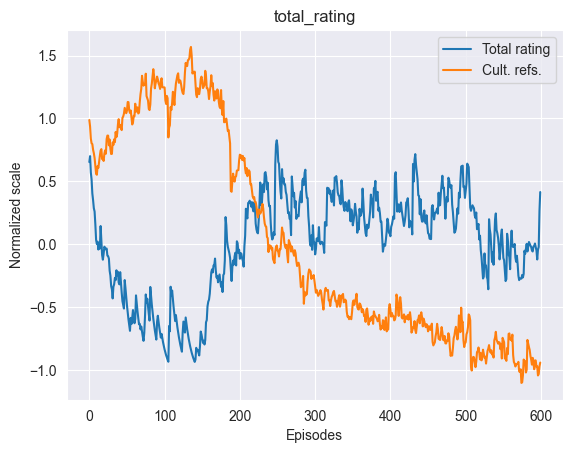

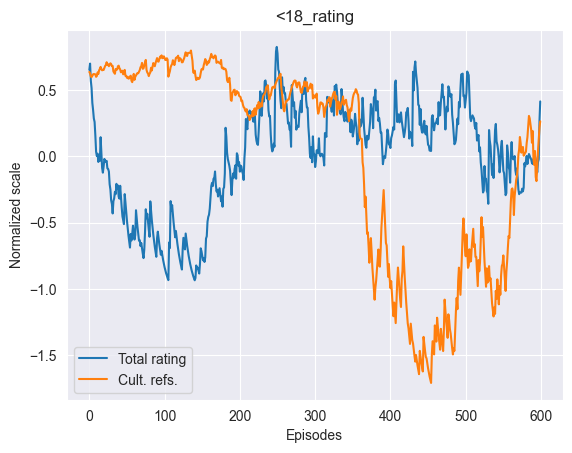

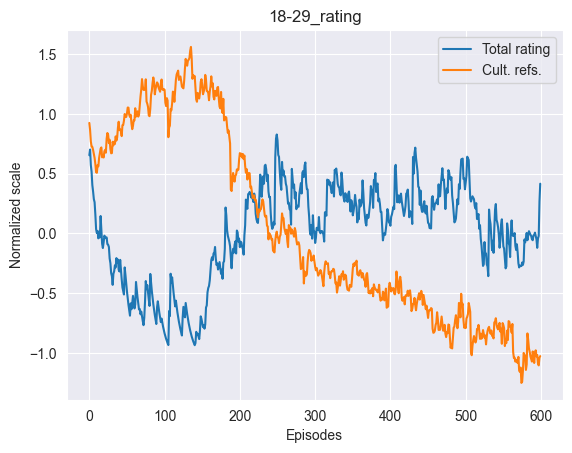

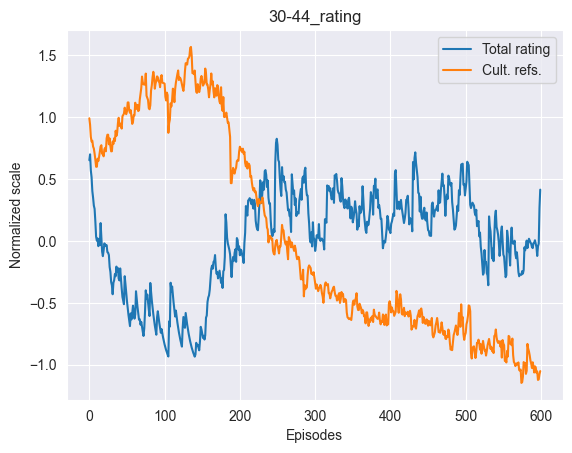

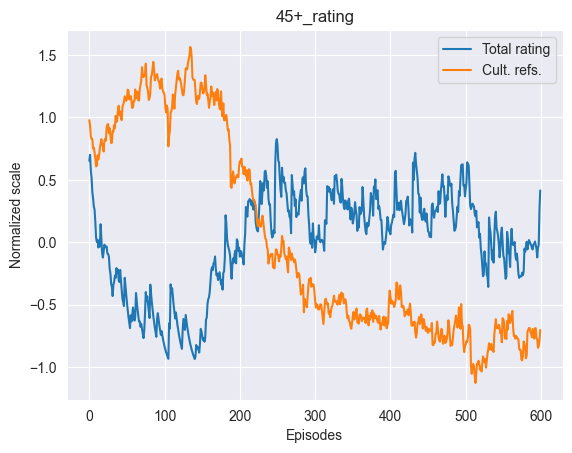

In [113]:
for col in cols:
    ratings_refs_graph(col)

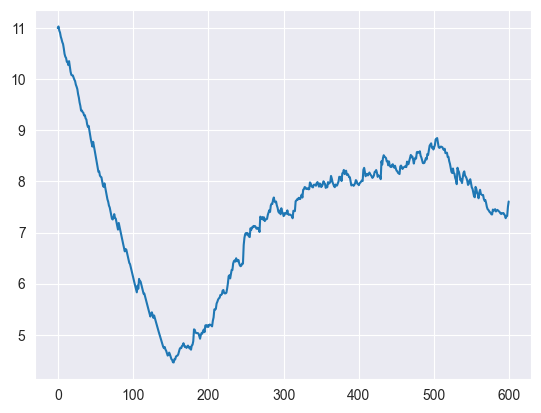

In [114]:
y = smooth(list(analysis_df['cult_refs_count']), 0.99)
plt.plot(y)

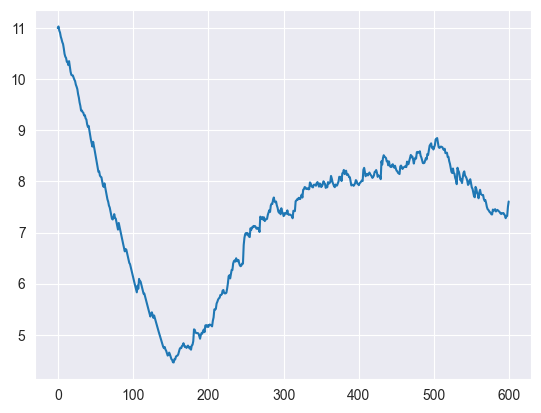

In [115]:
y = smooth(list(analysis_df['cult_refs_count']), 0.99)
plt.plot(y)